In [1]:
import os
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from ptflops import get_model_complexity_info
import sys

In [2]:
# find the path
path = os.getcwd()
print('This path dir is: ', path)

# find the parent dir
parent_path = os.path.dirname(path)
print('The parent path dir is: ', parent_path)

# # 构造sub_folder的绝对路径
# sub_folder_path = os.path.join(parent_path, 'sub_folder')
# 将sub_folder的路径添加到sys.path中
sys.path.append(parent_path)

# find the alexnet_path
alexnet_path = os.path.join(parent_path, 'Previous_data/Alexnet_train_data')
# alexnet_path = os.path.join(parent_path, 'Data/Alexnet_data')
print('The training data are saved in: ', alexnet_path)
# find all the fills resnet_path_folders
alexnet_path_folders = os.listdir(alexnet_path)
print('The folders in the training data folder are: ', alexnet_path_folders)

# find the googlenet_path
googlenet_path = os.path.join(parent_path, 'Previous_data/Googlenet_train_data')
# googlenet_path = os.path.join(parent_path, 'Data/Googlenet_data')
print('The training data are saved in: ', googlenet_path)
# find all the fills resnet_path_folders
googlenet_path_folders = os.listdir(googlenet_path)
print('The folders in the training data folder are: ', googlenet_path_folders)

# find the vgg_path
vgg_path = os.path.join(parent_path, 'Previous_data/Vgg_train_data')
# vgg_path = os.path.join(parent_path, 'Data/VGG_data')
print('The training data are saved in: ', vgg_path)
# find all the fills vgg_path_folders
vgg_path_folders = os.listdir(vgg_path)
print('The folders in the training data folder are: ', vgg_path_folders)

# find the resnet_path
resnet_path = os.path.join(parent_path, 'Previous_data/Resnet_train_data')
# resnet_path = os.path.join(parent_path, 'Data/Resnet_data')
print('The training data are saved in: ', resnet_path)
# find all the fills resnet_path_folders
resnet_path_folders = os.listdir(resnet_path)
print('The folders in the training data folder are: ', resnet_path_folders)

This path dir is:  /root/GreenAI/GPU/universal/Analysis_universal
The parent path dir is:  /root/GreenAI/GPU/universal
The training data are saved in:  /root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data
The folders in the training data folder are:  ['round1', 'round10', 'round2', 'round3', 'round4', 'round5', 'round6', 'round7', 'round8', 'round9']
The training data are saved in:  /root/GreenAI/GPU/universal/Previous_data/Googlenet_train_data
The folders in the training data folder are:  ['round1', 'round10', 'round2', 'round3', 'round4', 'round5', 'round6', 'round7', 'round8', 'round9']
The training data are saved in:  /root/GreenAI/GPU/universal/Previous_data/Vgg_train_data
The folders in the training data folder are:  ['round1', 'round10', 'round2', 'round3', 'round4', 'round5', 'round6', 'round7', 'round8', 'round9']
The training data are saved in:  /root/GreenAI/GPU/universal/Previous_data/Resnet_train_data
The folders in the training data folder are:  ['round1', 'round1

In [3]:
from alexnet_FashionMnist import FashionMnist
from resnet_FashionMnist import resnet_FashionMnist
from vgg_FashionMnist import vgg
from googlenet_FashionMnist import Googlenet

In [4]:
alexnet = FashionMnist()
resnet = resnet_FashionMnist()
googlenet = Googlenet()

conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
vgg11 = vgg(conv_arch)

In [5]:
with torch.cuda.device(0):
    macs, params = get_model_complexity_info(alexnet, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  46.76 M, 100.000% Params, 939.85 MMac, 99.883% MACs, 
  (0): Conv2d(11.71 k, 0.025% Params, 34.15 MMac, 3.630% MACs, 1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (1): ReLU(0, 0.000% Params, 279.94 KMac, 0.030% MACs, )
  (2): MaxPool2d(0, 0.000% Params, 279.94 KMac, 0.030% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(614.66 k, 1.314% Params, 415.51 MMac, 44.158% MACs, 96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(0, 0.000% Params, 173.06 KMac, 0.018% MACs, )
  (5): MaxPool2d(0, 0.000% Params, 173.06 KMac, 0.018% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(885.12 k, 1.893% Params, 127.46 MMac, 13.546% MACs, 256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(0, 0.000% Params, 55.3 KMac, 0.006% MACs, )
  (8): Conv2d(1.33 M, 2.839% Params, 191.16 MMac, 20.315% MACs, 384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): 

In [6]:
with torch.cuda.device(0):
    macs, params = get_model_complexity_info(resnet, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  11.18 M, 100.000% Params, 1.74 GMac, 99.820% MACs, 
  (0): Sequential(
    3.33 k, 0.030% Params, 43.35 MMac, 2.482% MACs, 
    (0): Conv2d(3.2 k, 0.029% Params, 40.14 MMac, 2.298% MACs, 1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(128, 0.001% Params, 1.61 MMac, 0.092% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(0, 0.000% Params, 802.82 KMac, 0.046% MACs, )
    (3): MaxPool2d(0, 0.000% Params, 802.82 KMac, 0.046% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    148.22 k, 1.326% Params, 464.83 MMac, 26.611% MACs, 
    (0): Residual(
      74.11 k, 0.663% Params, 232.42 MMac, 13.306% MACs, 
      (conv1): Conv2d(36.93 k, 0.330% Params, 115.81 MMac, 6.630% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(36.93 k, 0.330% Params, 115.81 MMac, 6.630% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [7]:
with torch.cuda.device(0):
    macs, params = get_model_complexity_info(googlenet, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  5.98 M, 100.000% Params, 1.51 GMac, 99.594% MACs, 
  (0): Sequential(
    3.2 k, 0.054% Params, 41.75 MMac, 2.752% MACs, 
    (0): Conv2d(3.2 k, 0.054% Params, 40.14 MMac, 2.646% MACs, 1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(0, 0.000% Params, 802.82 KMac, 0.053% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 802.82 KMac, 0.053% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    114.94 k, 1.923% Params, 361.87 MMac, 23.856% MACs, 
    (0): Conv2d(4.16 k, 0.070% Params, 13.05 MMac, 0.860% MACs, 64, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU(0, 0.000% Params, 200.7 KMac, 0.013% MACs, )
    (2): Conv2d(110.78 k, 1.853% Params, 347.42 MMac, 22.903% MACs, 64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(0, 0.000% Params, 602.11 KMac, 0.040% MACs, )
    (4): MaxPool2d(0, 0.000% Params, 602.11 KMac, 0.040% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=

In [8]:
with torch.cuda.device(0):
    macs, params = get_model_complexity_info(vgg11, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  128.81 M, 100.000% Params, 7.57 GMac, 99.821% MACs, 
  (0): Sequential(
    640, 0.000% Params, 38.54 MMac, 0.508% MACs, 
    (0): Conv2d(640, 0.000% Params, 32.11 MMac, 0.424% MACs, 1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 3.21 MMac, 0.042% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 3.21 MMac, 0.042% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    73.86 k, 0.057% Params, 929.66 MMac, 12.262% MACs, 
    (0): Conv2d(73.86 k, 0.057% Params, 926.45 MMac, 12.219% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 1.61 MMac, 0.021% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 1.61 MMac, 0.021% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    885.25 k, 0.687% Params, 2.78 GMac, 36.648% MACs, 
    (0): Conv2d(295.17 k, 0.229% Params, 925.65 MMac, 12.209% MACs, 128, 256, kernel_size=(3,

In [9]:
alexnet_subfolders = []
resnet_subfolders = []
googlenet_subfolders = []
vgg11_subfolders = []
for round in alexnet_path_folders:
    alexnet_subfolders.append(os.path.join(alexnet_path, round))
print('The alexnet subfolders are: ', alexnet_subfolders)
for round in resnet_path_folders:
    resnet_subfolders.append(os.path.join(resnet_path, round))
print('The resnet subfolders are: ', resnet_subfolders)
for round in googlenet_path_folders:
    googlenet_subfolders.append(os.path.join(googlenet_path, round))
print('The resnet subfolders are: ', googlenet_subfolders)
for round in vgg_path_folders:
    vgg11_subfolders.append(os.path.join(vgg_path, round))
print('The resnet subfolders are: ', vgg11_subfolders)

The alexnet subfolders are:  ['/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round1', '/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round10', '/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round2', '/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round3', '/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round4', '/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round5', '/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round6', '/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round7', '/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round8', '/root/GreenAI/GPU/universal/Previous_data/Alexnet_train_data/round9']
The resnet subfolders are:  ['/root/GreenAI/GPU/universal/Previous_data/Resnet_train_data/round1', '/root/GreenAI/GPU/universal/Previous_data/Resnet_train_data/round10', '/root/GreenAI/GPU/universal/Previous_data/Resnet_train_data/round2', '/root/GreenAI/GPU/

In [10]:
Round = 10
Epoch = 10

In [11]:
alexnet_round = np.zeros((Round,Epoch,6))
resnet_round = np.zeros((Round,Epoch,6))
googlenet_round = np.zeros((Round,Epoch,6))
vgg11_round = np.zeros((Round,Epoch,6))

In [12]:
for round in range(len(alexnet_subfolders)):
    alexnet_roundi = np.load(os.path.join(alexnet_subfolders[round],'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    alexnet_round[round,:,:] = alexnet_roundi
    resnet_roundi = np.load(os.path.join(resnet_subfolders[round],'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    resnet_round[round,:,:] = resnet_roundi
    googlenet_roundi = np.load(os.path.join(googlenet_subfolders[round],'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    googlenet_round[round,:,:] = googlenet_roundi
    vgg11_roundi = np.load(os.path.join(vgg11_subfolders[round],'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    vgg11_round[round,:,:] = vgg11_roundi

In [13]:
print(alexnet_round.shape, resnet_round.shape, googlenet_round.shape, vgg11_round.shape)

(10, 10, 6) (10, 10, 6) (10, 10, 6) (10, 10, 6)


In [14]:
# calculate the average by rounds
alexnet_round_mean = np.mean(alexnet_round, axis=0)
resnet_round_mean = np.mean(resnet_round, axis=0)
googlenet_round_mean = np.mean(googlenet_round, axis=0)
vgg11_round_mean = np.mean(vgg11_round, axis=0)

In [15]:
print(alexnet_round_mean.shape, resnet_round_mean.shape, googlenet_round_mean.shape, vgg11_round_mean.shape)

(10, 6) (10, 6) (10, 6) (10, 6)


In [16]:
# calculate the average by epochs
alexnet_epoch_mean = np.mean(alexnet_round_mean, axis = 0)
resnet_epoch_mean = np.mean(resnet_round_mean, axis = 0)
googlenet_epoch_mean = np.mean(googlenet_round_mean, axis = 0)
vgg11_epoch_mean = np.mean(vgg11_round_mean, axis = 0)

In [17]:
print(alexnet_epoch_mean.shape, resnet_epoch_mean.shape, googlenet_epoch_mean.shape, vgg11_epoch_mean.shape)
print(alexnet_epoch_mean)
print(resnet_epoch_mean)
print(googlenet_epoch_mean)
print(vgg11_epoch_mean)

(6,) (6,) (6,) (6,)
[ 2.02167423 11.34454767  0.13289068 22.88239971  0.99449076  2.80769468]
[ 2.01232557 41.84458819  0.11137463 86.43133922  0.38518537  7.54545342]
[ 2.0148199  45.88915199  0.13955033 96.29885418  0.32320046  8.61435796]
[ 2.02792536 41.81388299  0.10870905 86.56527978  0.38048305  7.57771523]


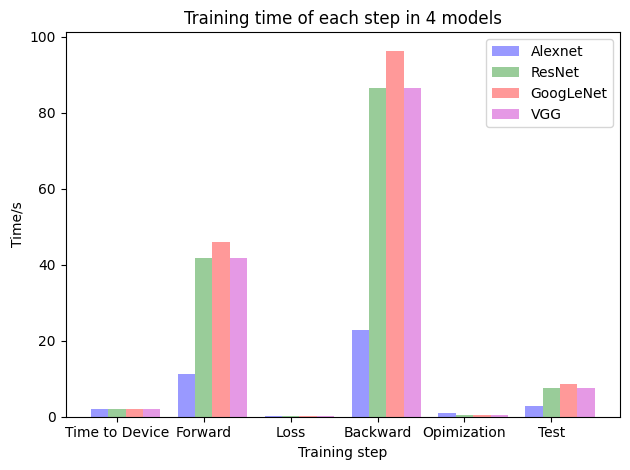

In [18]:
# plot the alexnet_epoch_mean, resnet_epoch_mean, googlenet_epoch_mean, vgg11_epoch_mean result in one figure using bar chart
fig, ax = plt.subplots()
index = np.arange(6)
bar_width = 0.2
opacity = 0.4
rects1 = plt.bar(index, alexnet_epoch_mean, bar_width, alpha=opacity, color='b', label='Alexnet')
rects2 = plt.bar(index+bar_width, resnet_epoch_mean, bar_width, alpha=opacity, color='g', label='ResNet')
rects3 = plt.bar(index+2*bar_width, googlenet_epoch_mean, bar_width, alpha=opacity, color='r', label='GoogLeNet')
rects4 = plt.bar(index+3*bar_width, vgg11_epoch_mean, bar_width, alpha=opacity, color='m', label='VGG')
plt.xlabel('Training step')
plt.ylabel('Time/s')
plt.title('Training time of each step in 4 models')
plt.xticks(index + bar_width, ('Time to Device', 'Forward', 'Loss', 'Backward', 'Opimization', 'Test'))
plt.legend()
plt.tight_layout()
plt.show()
